# Digit Recognition Competition


### Import packages

In [1]:
# import numpy, pandas, seaborn, matplotlib, itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# imports from sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# imports from keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# matplot lib display
%matplotlib inline

Using TensorFlow backend.


### The competition data sets

In [2]:
# load data using pandas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Review the shape of each set. The training set has 42000 images while the test is 28000
# Each image is 28x28 pixels, mapped into 784 columns with a column of labels in the training set
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


#### If we visualize the training set, we can see there's a fairly even distribution of the numbers 0-9

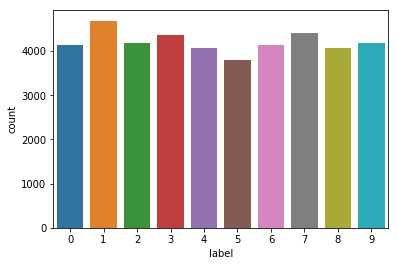

In [6]:
# create a separate array with the training labels 
Y_train = train["label"]
# take a look at distribution of labels
g= sns.countplot(Y_train)

### Data preparation

In [7]:
# remove labels from the training data
X_train = train.drop(labels=["label"], axis =1)

In [8]:
# Normalize the data, it is on the 256-color
X_train = X_train / 255.0
test = test / 255.0

In [9]:
# shape the data, converting the training and test set into arrays of the 28x28 images
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
# review the new shapes
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [11]:
# convert the training labels to categorical values
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# split the training data into training and validation sets using a random seed
r_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, 
                                                  Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=r_seed)

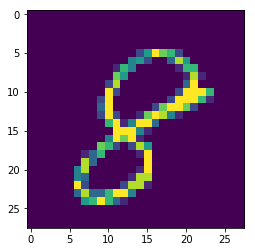

In [13]:
# Take a look at an image from the training set
g = plt.imshow(X_train[0][:,:,0])

### Create the model

#### We are establishing a convolutional neural network, with layers as commented

In [14]:
model = Sequential() #establish the model

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))       # convolution layer with relu activation
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))                                # convolution layer with relu activation
model.add(MaxPool2D(pool_size=(2,2)))                                # max pooling
model.add(Dropout(0.25))                                             # dropout


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))                                # convolution layer with relu activation
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))                                # convolution layer with relu activation
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))                 # max pooling
model.add(Dropout(0.25))                                             # dropout


model.add(Flatten())                                                 # flatten
model.add(Dense(256, activation = "relu"))                           # dense layer with relu activation
model.add(Dropout(0.5))                                              # dropout
model.add(Dense(10, activation = "softmax"))                         # dense layer, softmax activation for 10 possible classes

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### A more crisp review of the model architecture and parameters along the way

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [16]:
# Define the optimizer
optimizer = RMSprop(lr=0.001,       # small learning rate 
                    rho=0.9,        # default values
                    epsilon=1e-08, 
                    decay=0.0)

In [17]:
# Compile the model
model.compile(optimizer = optimizer, 
              loss = "categorical_crossentropy", # loss function is categorical log loss
              metrics=["accuracy"])

In [18]:
# Set a learning rate annealer, adjust the learning rate if we stop making progress
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', # pay attention to accuracy
                                            patience=3,        # number of epochs w/o improvement to wait before reducing
                                            verbose=1,         # include messages
                                            factor=0.5,        # factor by which to decrease the learning rate
                                            min_lr=0.000001)    # a lower bound on the rate

In [19]:
epochs = 30     # review the data 30 times
batch_size = 86 # in batches of size 86

### Data Augmentation

In [20]:
datagen = ImageDataGenerator(zoom_range = 0.1,         # vary the zoom of the images
                            height_shift_range = 0.1,  # shift images vertically
                            width_shift_range = 0.1,   # shift images horizontally
                            rotation_range = 10)       # vary the rotation of images in a 10 degree range

datagen.fit(X_train)

#### Model training - this step takes time!

In [21]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (X_val,Y_val),
                              verbose = 2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 198s - loss: 0.4420 - acc: 0.8555 - val_loss: 0.0820 - val_acc: 0.9755
Epoch 2/30
 - 201s - loss: 0.1326 - acc: 0.9613 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 3/30
 - 201s - loss: 0.0967 - acc: 0.9720 - val_loss: 0.0442 - val_acc: 0.9864
Epoch 4/30
 - 201s - loss: 0.0823 - acc: 0.9755 - val_loss: 0.0340 - val_acc: 0.9902
Epoch 5/30
 - 200s - loss: 0.0722 - acc: 0.9786 - val_loss: 0.0307 - val_acc: 0.9910
Epoch 6/30
 - 200s - loss: 0.0648 - acc: 0.9805 - val_loss: 0.0262 - val_acc: 0.9917
Epoch 7/30
 - 200s - loss: 0.0611 - acc: 0.9826 - val_loss: 0.0258 - val_acc: 0.9933
Epoch 8/30
 - 200s - loss: 0.0582 - acc: 0.9832 - val_loss: 0.0302 - val_acc: 0.9924
Epoch 9/30
 - 200s - loss: 0.0620 - acc: 0.9832 - val_loss: 0.0298 - val_acc: 0.9910
Epoch 10/30
 - 200s - loss: 0.0564 - acc: 0.9836 - val_loss: 0.0294 - val_acc: 0.9929

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 11/30
 - 199s 

#### In an earlier attempt we did not use data augmentation - the results can be seen below. 

In [20]:
# history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
#          validation_data = (X_val, Y_val), verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 197s - loss: 0.2308 - acc: 0.9265 - val_loss: 0.0652 - val_acc: 0.9783
Epoch 2/30
 - 200s - loss: 0.0708 - acc: 0.9789 - val_loss: 0.0457 - val_acc: 0.9871
Epoch 3/30
 - 199s - loss: 0.0550 - acc: 0.9835 - val_loss: 0.0367 - val_acc: 0.9895
Epoch 4/30
 - 217s - loss: 0.0451 - acc: 0.9865 - val_loss: 0.0352 - val_acc: 0.9900
Epoch 5/30
 - 212s - loss: 0.0410 - acc: 0.9884 - val_loss: 0.0314 - val_acc: 0.9912
Epoch 6/30
 - 205s - loss: 0.0365 - acc: 0.9887 - val_loss: 0.0301 - val_acc: 0.9919
Epoch 7/30
 - 200s - loss: 0.0337 - acc: 0.9904 - val_loss: 0.0381 - val_acc: 0.9921
Epoch 8/30
 - 199s - loss: 0.0338 - acc: 0.9903 - val_loss: 0.0323 - val_acc: 0.9919
Epoch 9/30
 - 199s - loss: 0.0327 - acc: 0.9900 - val_loss: 0.0471 - val_acc: 0.9898
Epoch 10/30
 - 200s - loss: 0.0309 - acc: 0.9910 - val_loss: 0.0435 - val_acc: 0.9921
Epoch 11/30
 - 200s - loss: 0.0287 - acc: 0.9914 - v

### Reviewing the results

#### Loss curve for training compared to validation

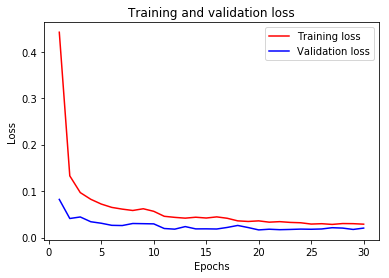

In [22]:
# Plot the loss and accuracy curves for training and validation 
loss = history.history['loss']
val_loss = history.history['val_loss']
eps = range(1, len(loss) + 1)
plt.plot(eps, loss, color='red', label='Training loss')
plt.plot(eps, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy for training compared to validation

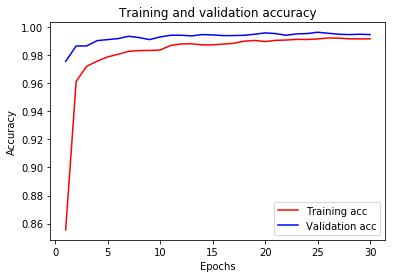

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(eps, acc, color='red', label='Training acc')
plt.plot(eps, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Confusion matrix to review validation results of predicting the validation set

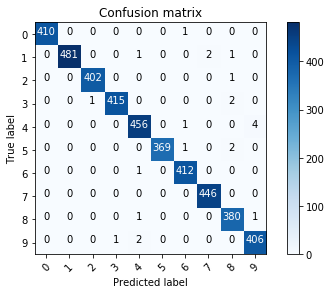

In [24]:
#confusion matrix for model
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

##### Interestingly, it looks like many of the misclassified labels were predicted as 8

#### View some of the incorrectly classified images

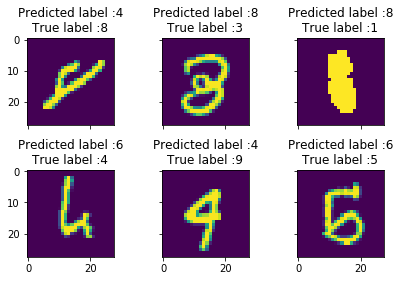

In [25]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.tight_layout() # Fixes spacing in the plot

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


##### These errors are not unreasonable, the model metrics look good and this sample supports that

### Create predictions and Kaggle submission file

In [26]:
# predict results
results = model.predict(test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [27]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [28]:
submission.to_csv("submission.csv", index=False, header=True)